In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
os.chdir('../')

In [18]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

def plot_regression(X,y):
    fig, axes = plt.subplots(nrows=1, ncols=2 ,figsize = (14,4))
    axes[0].set_xlabel("$x_1$", fontsize=18)
    axes[0].plot(X, y, "b.")
    return fig, axes

(-0.04354612385024335,
 1.035955177574363,
 -0.21187377599595636,
 1.2085528843278157)

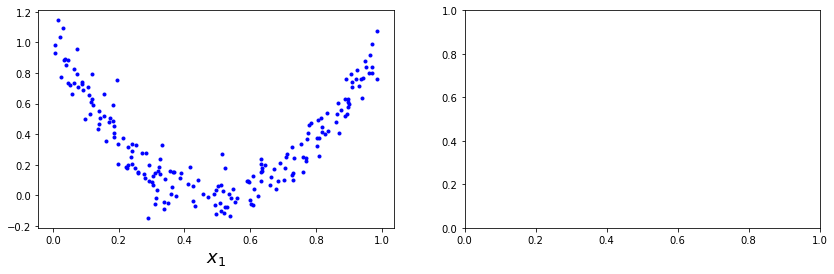

In [21]:
fig, axes = plot_regression(X,y)
axes[0].axis()

In [6]:
from Trees.GradientBoost import GradientBoostTree
from  importlib import reload as rl
import Trees.GradientBoost
rl(Trees.DecisionTree)
rl(Trees.GradientBoost)
from Trees.GradientBoost import GradientBoostTree
gbdt = GradientBoostTree(n_estimator=100,learning_rate=0.9,max_depth=5)

In [39]:
axes[1]

<AxesSubplot:>

d:\python37\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
d:\python37\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\python37\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
d:\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':
d:\python37\

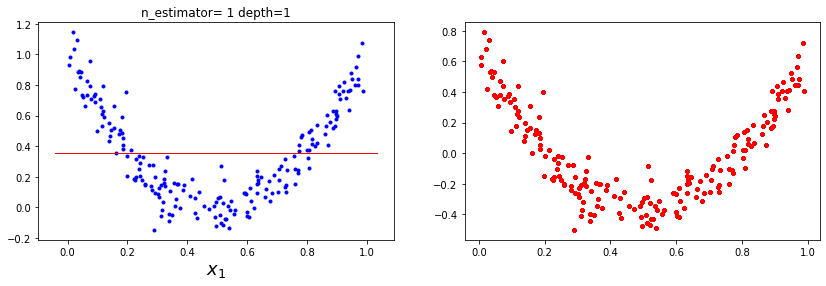

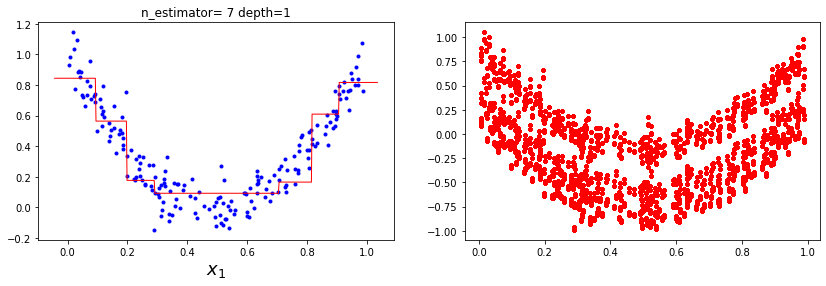

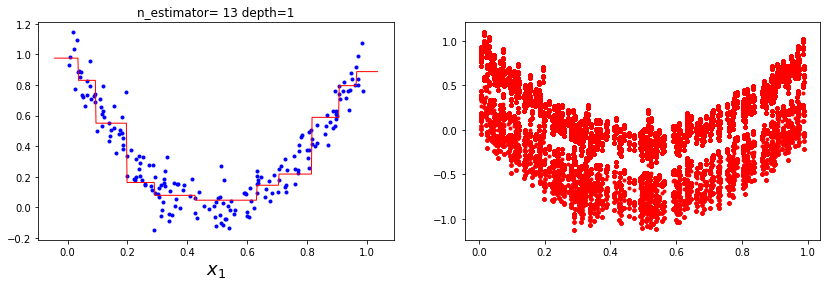

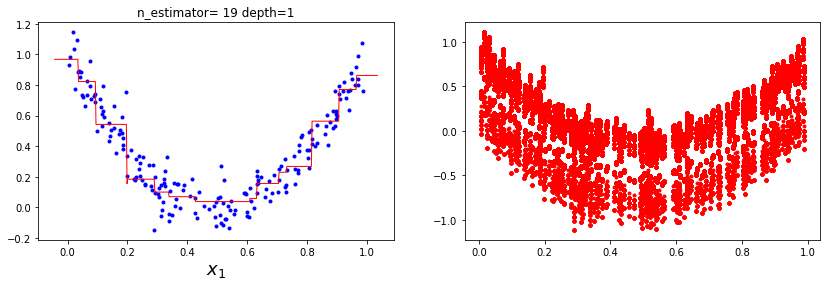

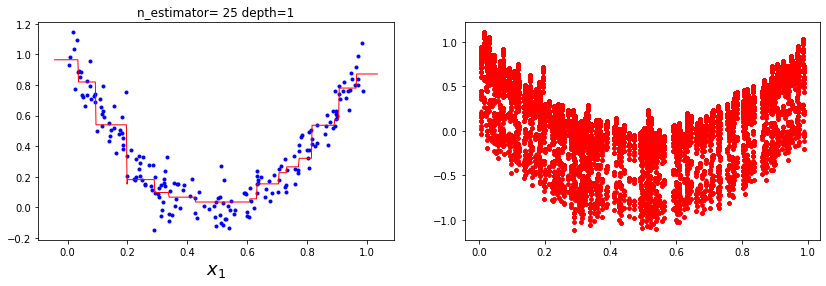

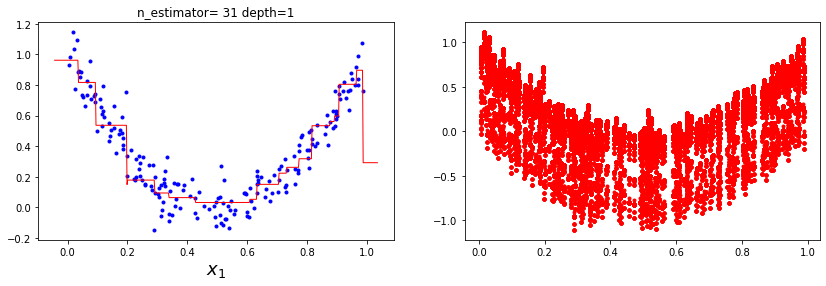

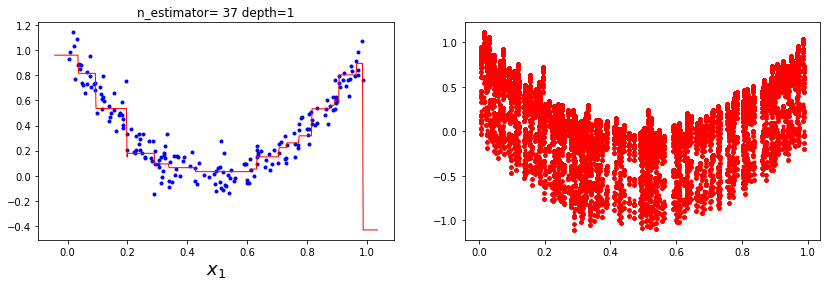

In [35]:
for n_estimator in range(1,40,6):
    depth = 1
    fig, axes = plot_regression(X,y)
    axe = axes[0].axis()
    x1 = np.linspace(axe[0], axe[1], 500).reshape(-1, 1)
    gbdt = GradientBoostTree(n_estimator=n_estimator, learning_rate=0.9,max_depth=depth)
    gbdt.fit(X,y)
    axes[0].set_title('n_estimator= {} depth={}'.format(n_estimator,depth))
    y_pred = gbdt.predict(x1)
    axes[0].plot(x1, y_pred, "r-", linewidth=1, label=r"$\hat{y}$")
    axes[1].plot(X, y-gbdt.predict(X), "r.", linewidth=1, label=r"$\hat{y}$")  
    fig.show()

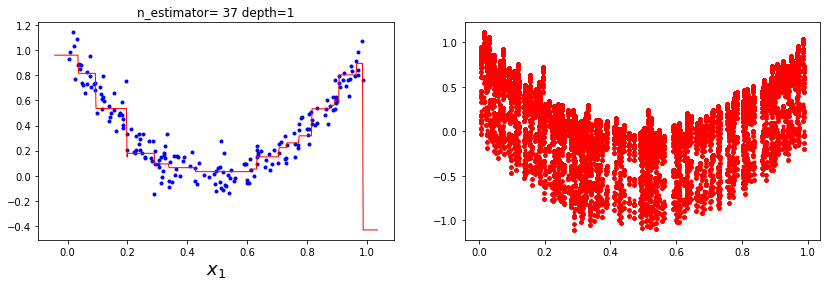

In [36]:
fig